In [31]:
from sympy import *
init_printing()

# Tensor Diffusion. Eigenvalues, eigenvectors and absolute Jacobian

We can represent this matrix symbolically in SymPy and explore its eigensystem.

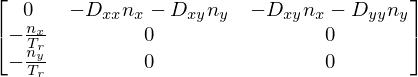

In [32]:
from sympy.abc import rho, beta, nu

a, nu_xx,nu_xy,nu_yx,nu_yy, b= symbols('a D_{xx} D_{xy} D_{yx} D_{yy} b')

n_x, n_y, Tr = symbols('n_x n_y T_r')

# Jacobian in x
H = Matrix([[0, -1, 0], [-nu_xx/Tr, 0, 0], [-nu_xy/Tr, 0, 0]])

# H = Matrix([[0, 0,-nu_yy], [0, 0, 0], [-1, 0, 0]])

H = Matrix([[0, -nu_xx*n_x-nu_xy*n_y,-nu_xy*n_x-nu_yy*n_y], [-n_x/Tr,0, 0], [-n_y/Tr, 0, 0]])
H

The eigenvalues are the speeds at which information propagates with.  SymPy returns them as a
dictionary, giving the multiplicity for each eigenvalue.

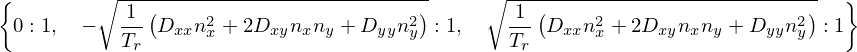

In [33]:
lamb = H.eigenvals()
simplify(lamb)

# J = lamb * numpy.identity(3)

In [34]:
# B.eigenvals()

The right eigenvectors are what SymPy gives natively.  For a given eigenvalue, $\lambda$, these 
satisfy:
    
$$A r = \lambda r$$

## Right Eigenvectors

In [35]:
R = H.eigenvects()   # this returns a tuple for each eigenvector with multiplicity -- unpack it
r = []
lam = []
for (ev, _, rtmp) in R:
    r.append(rtmp[0])
    lam.append(ev)
    
# # we can normalize them anyway we want, so let's make the first entry 1
# for n in range(len(r)):
#     v = r[n]
#     r[n] = v/v[0]

### 0-th right eigenvector 

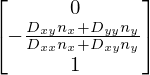

In [36]:
simplify(r[0])

this corresponds to the eigenvalue

In [37]:
lam[0]

### 1-st right eigenvector

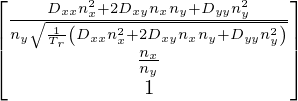

In [38]:
simplify(r[1])

this corresponds to the eigenvalue

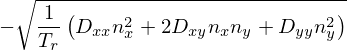

In [39]:
lam[1]

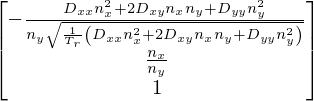

In [40]:
simplify(r[2])

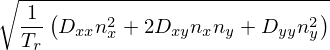

In [41]:
lam[2]

### 2-nd right eigenvector

this corresponds to the eigenvalue

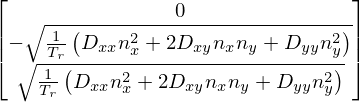

In [42]:
lambd = Matrix (lam)
lambd

# Here they are as a matrix, $R$, in order from smallest to largest eigenvalue

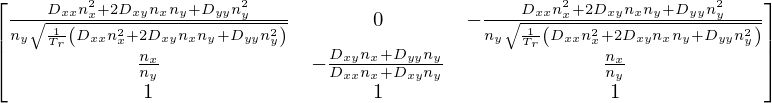

In [43]:
R = zeros(3,3)
R[:,0] = r[1]
R[:,1] = r[0]
R[:,2] = r[2]
simplify(simplify(R))

## Left Eigenvectors

The left eigenvectors satisfy:

$$l A = \lambda l$$

SymPy doesn't have a method to get left eigenvectors directly, so we take the transpose of this expression:

$$(l A)^\intercal = A^\intercal l^\intercal = \lambda l^\intercal$$

Therefore, the transpose of the left eigenvectors, $l^\intercal$, are the right eigenvectors of transpose of $A$

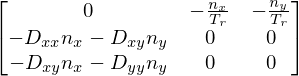

In [44]:
C = H.transpose()
C

In [45]:
L = C.eigenvects()
l = []
laml = []
for (ev, _, ltmp) in L:
    l.append(ltmp[0].transpose())
    laml.append(ev)
    

Traditionally, we normalize these such that $l^{(\mu)} \cdot r^{(\nu)} = \delta_{\mu\nu}$

In [46]:
for n in range(len(l)):
    if lam[n] == laml[n]:
        ltmp = l[n]
        p = ltmp.dot(r[n])
        l[n] = ltmp/p

### 0-th left eigenvector

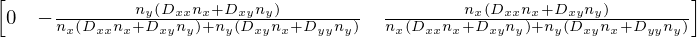

In [47]:
simplify(l[0])

### 1-st left eigenvector

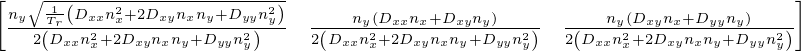

In [48]:
simplify(l[1])

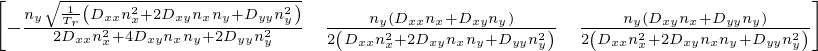

In [49]:
simplify(l[2])

### 2-nd left eigenvector

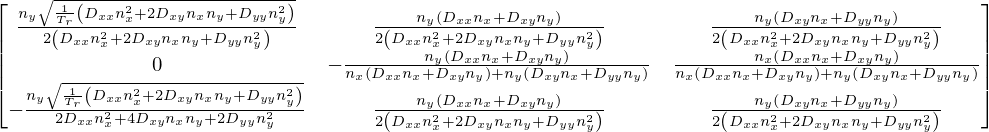

In [50]:
L = zeros(3,3)
L[0,:] = l[1]
L[1,:] = l[0]
L[2,:] = l[2]
simplify(L)

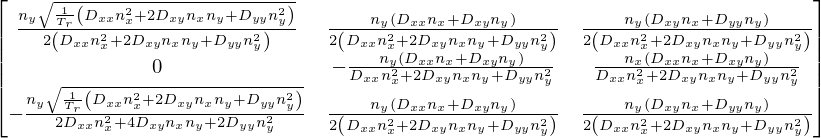

In [51]:
simplify(R**-1)

# The Jacobian Matrix

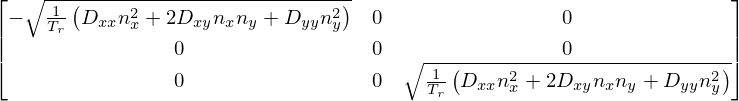

In [52]:
# mod=Matrix([[-sqrt(nu_xx), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_xx)]])
# mod=Matrix([[-sqrt(nu_yy), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_yy)]])
# mod
# ND = Matrix([[-sqrt(nu_xx/Tr), 0, 0], [0, 0, 0], [0, 0, sqrt(nu_xx/Tr)]])
ND = Matrix([[- sqrt((nu_xx*n_x*n_x + 2*nu_xy*n_x*n_y+nu_yy*n_y*n_y)/Tr), 0, 0], [0, 0, 0], [0, 0, sqrt((nu_xx*n_x*n_x + 2*nu_xy*n_x*n_y+nu_yy*n_y*n_y)/Tr)]])

simplify(ND)

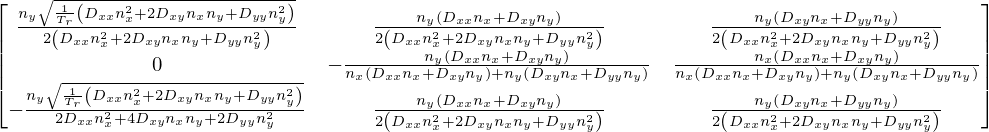

In [53]:
simplify(L)

# Verification of the procedure 

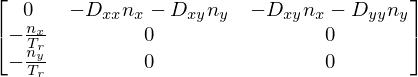

In [54]:
simplify(R*ND*R**-1)

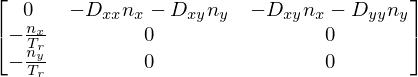

In [55]:
simplify(R*ND*L)

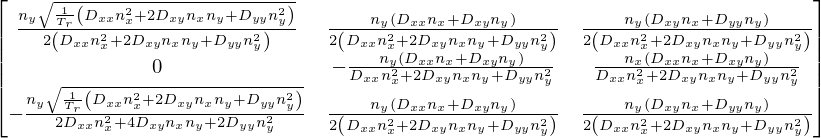

In [56]:
simplify(R**-1)

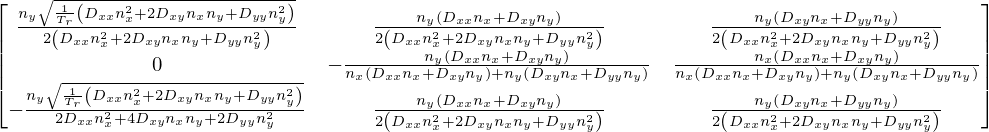

In [57]:
simplify(L)

# The absolute Jacobian is given by

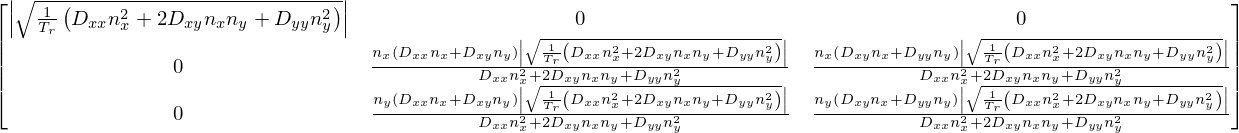

In [58]:
simplify(R*abs(ND)*R**-1)

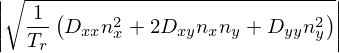

In [59]:
abs(sqrt((nu_xx*n_x*n_x + 2*nu_xy*n_x*n_y+nu_yy*n_y*n_y)/Tr))

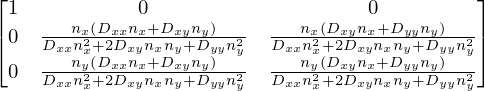

In [60]:
(simplify(R*abs(ND)*R**-1)/abs(sqrt((nu_xx*n_x*n_x + 2*nu_xy*n_x*n_y+nu_yy*n_y*n_y)/Tr)))